# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [42]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_columns', 500)

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [10]:
len(data[data.race=='w'])

2435

In [11]:
len(data[data.race=='b'])

2435

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [8]:
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [49]:
# Declare variables

n1 = len(data[data.race=='b'])
n2 = len(data[data.race=='w'])

x1 = sum(data[data.race=='b'].call)
x2 = sum(data[data.race=='w'].call)

p1 = x1/n1
p2 = x2/n2

p_hat = (x1+x2)/(n1+n2)

cv = 1.96

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Q1

What test is appropriate for this problem? 

A two-sample z-test for proportions.

Does CLT apply?

Yes

Q2

Null: There is no difference between the rate of callbacks for black-sounding names and white-sounding names.

Alternative: There is a difference between the rate of callbacks for black-sounding names and white-sounding names.

In [29]:
w = data[data.race=='w']
b = data[data.race=='b']

Q3

Bootstrapping approach:

In [36]:
both = np.concatenate((w.call, b.call))

both_perm = np.random.permutation(both)

perm_sample_a = both_perm[:len(w.call)]
perm_sample_b = both_perm[len(w.call):]

sum(perm_sample_b)

205.0

In [37]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [38]:
def draw_perm_reps(data_1, data_2, size=1):
    """Generate multiple permutation replicates for func: difference of proportions."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = (sum(perm_sample_1)/len(perm_sample_1)) - (sum(perm_sample_2)/len(perm_sample_2))

    return perm_replicates

In [40]:
bootstrap_reps = draw_perm_reps(w.call, b.call, size=10000) 

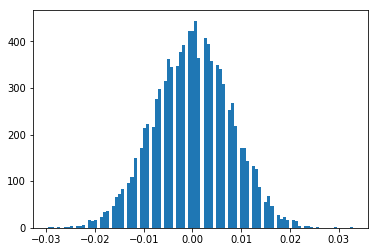

In [46]:
plt.hist(bootstrap_reps, bins=int(np.sqrt(10000)));

In [52]:
# Margin of error

# First calculate the standard error for the difference between proportions.
se = np.sqrt(((p1*(1-p1))/n1)+((p2*(1-p2))/n2))

# Second calculate the margin of error
margin_of_error = cv * se
margin_of_error

0.015255406349886438

In [47]:
# Confidence Interval
np.percentile(bootstrap_reps, [2.5, 97.5])

array([-0.01560575,  0.01478439])

In [51]:
# P-value
p = np.sum(bootstrap_reps <= (p1-p2))/10000
p

0.0

Frequentist approach

Margin of Error:

In [28]:
# Calculate the margin of error

# First calculate the standard error for the difference between proportions.
se = np.sqrt(((p1*(1-p1))/n1)+((p2*(1-p2))/n2))

# Second calculate the margin of error
margin_of_error = cv * se
margin_of_error

0.015255406349886438

Confidence Interval:

Alpha = 0.05

Critical Value (cv) = +/- 1.96

In [25]:
# Calculate upper bound for the confidence interval for the difference of proportions.

conf_int_positive = (p1-p2)+cv*np.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2))
conf_int_positive

-0.016777447859559147

In [26]:
# Calculate lower bound for the confidence interval for the difference of proportions.

conf_int_negative = (p1-p2)-cv*np.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2))
conf_int_negative

-0.047288260559332024

P-value calculations:

In [16]:
# Calculate z

z = (p1-p2)/(np.sqrt(p_hat*(1-p_hat))*np.sqrt(1/n1+1/n2))
z

-4.108412152434346

p-value = .00004 and it is significant at p < .05.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

Q4 - Write a story describing the statistical significance in the context or the original problem.



We are confident at the 95% confidence level that race has a significant impact on the rate of callbacks for resumes.

Q5 - Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Not necessarily. There may be other factors that have a stronger correlation with callback success. To test this, we would need to perform a regression analysis on all the features to determine which are the most correlated with callback success.